<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://ums.asu.edu.eg/images/logo.png" width="100" /></a></p>
<div align=left>
<h1>
  Body Signal of Smoking 🚭
</h1>
    <h5>
        Data Analytics project
    </h5>
</div>
<br>
<br>

## Introduction
This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

## All libraries we need through the notebook

In [43]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from termcolor import colored
import scipy.stats as st
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to see model hyperparameters
from sklearn import set_config
set_config(print_changed_only = False)

# to show all columns
pd.set_option('display.max_columns', 30)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


## Reading the dataset

In [2]:
df = pd.read_csv('smoking.csv')
df.head(n = 10).style.background_gradient(cmap = "Blues")

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.300000,1.200000,1.000000,1,1,114,73,94,215,82,73,126,12.900000,1,0.700000,18,19,27,Y,0,Y,N
1,1,F,40,160,60,81.000000,0.800000,0.600000,1,1,119,70,130,192,115,42,127,12.700000,1,0.600000,22,19,18,Y,0,Y,N
2,2,M,55,170,60,80.000000,0.800000,0.800000,1,1,138,86,89,242,182,55,151,15.800000,1,1.000000,21,16,22,Y,0,N,Y
3,3,M,40,165,70,88.000000,1.500000,1.500000,1,1,100,60,96,322,254,45,226,14.700000,1,1.000000,19,26,18,Y,0,Y,N
4,4,F,40,155,60,86.000000,1.000000,1.000000,1,1,120,74,80,184,74,62,107,12.500000,1,0.600000,16,14,22,Y,0,N,N
5,5,M,30,180,75,85.000000,1.200000,1.200000,1,1,128,76,95,217,199,48,129,16.200000,1,1.200000,18,27,33,Y,0,Y,N
6,6,M,40,160,60,85.500000,1.000000,1.000000,1,1,116,82,94,226,68,55,157,17.000000,1,0.700000,21,27,39,Y,1,Y,Y
7,7,M,45,165,90,96.000000,1.200000,1.000000,1,1,153,96,158,222,269,34,134,15.000000,1,1.300000,38,71,111,Y,0,Y,N
8,9,F,50,150,60,85.000000,0.700000,0.800000,1,1,115,74,86,210,66,48,149,13.700000,1,0.800000,31,31,14,Y,0,N,N
9,10,M,45,175,75,89.000000,1.000000,1.000000,1,1,113,64,94,198,147,43,126,16.000000,1,0.800000,26,24,63,Y,0,N,N


In [3]:
# Drop ID
df = df.drop("ID", axis = 1)

In [4]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

####
#### We see thet the dataset attributes are divided into dependent and independent attributes.
#### The inedependent attributes are :
- ID : index
- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure (measures the pressure in your arteries when your heart beats)
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status<br>
#### The dependent attribute or (The target variable) is :
- smoking: NO smoking = N, YES smoking = Y

# Data Cleaning

In [5]:
# Checking the nulls
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [6]:
df.shape

(55692, 26)

In [7]:
# Droping the redundant data
df = df.drop_duplicates()

In [8]:
df.shape

(44552, 26)

##### We see that there is no nulls and no redunduncy in our dataset<br>

### Checking and Removing the Outliers

In [9]:
df.head(n = 10).style.background_gradient(cmap = "Blues")

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.300000,1.200000,1.000000,1,1,114,73,94,215,82,73,126,12.900000,1,0.700000,18,19,27,Y,0,Y,N
1,F,40,160,60,81.000000,0.800000,0.600000,1,1,119,70,130,192,115,42,127,12.700000,1,0.600000,22,19,18,Y,0,Y,N
2,M,55,170,60,80.000000,0.800000,0.800000,1,1,138,86,89,242,182,55,151,15.800000,1,1.000000,21,16,22,Y,0,N,Y
3,M,40,165,70,88.000000,1.500000,1.500000,1,1,100,60,96,322,254,45,226,14.700000,1,1.000000,19,26,18,Y,0,Y,N
4,F,40,155,60,86.000000,1.000000,1.000000,1,1,120,74,80,184,74,62,107,12.500000,1,0.600000,16,14,22,Y,0,N,N
5,M,30,180,75,85.000000,1.200000,1.200000,1,1,128,76,95,217,199,48,129,16.200000,1,1.200000,18,27,33,Y,0,Y,N
6,M,40,160,60,85.500000,1.000000,1.000000,1,1,116,82,94,226,68,55,157,17.000000,1,0.700000,21,27,39,Y,1,Y,Y
7,M,45,165,90,96.000000,1.200000,1.000000,1,1,153,96,158,222,269,34,134,15.000000,1,1.300000,38,71,111,Y,0,Y,N
8,F,50,150,60,85.000000,0.700000,0.800000,1,1,115,74,86,210,66,48,149,13.700000,1,0.800000,31,31,14,Y,0,N,N
9,M,45,175,75,89.000000,1.000000,1.000000,1,1,113,64,94,198,147,43,126,16.000000,1,0.800000,26,24,63,Y,0,N,N


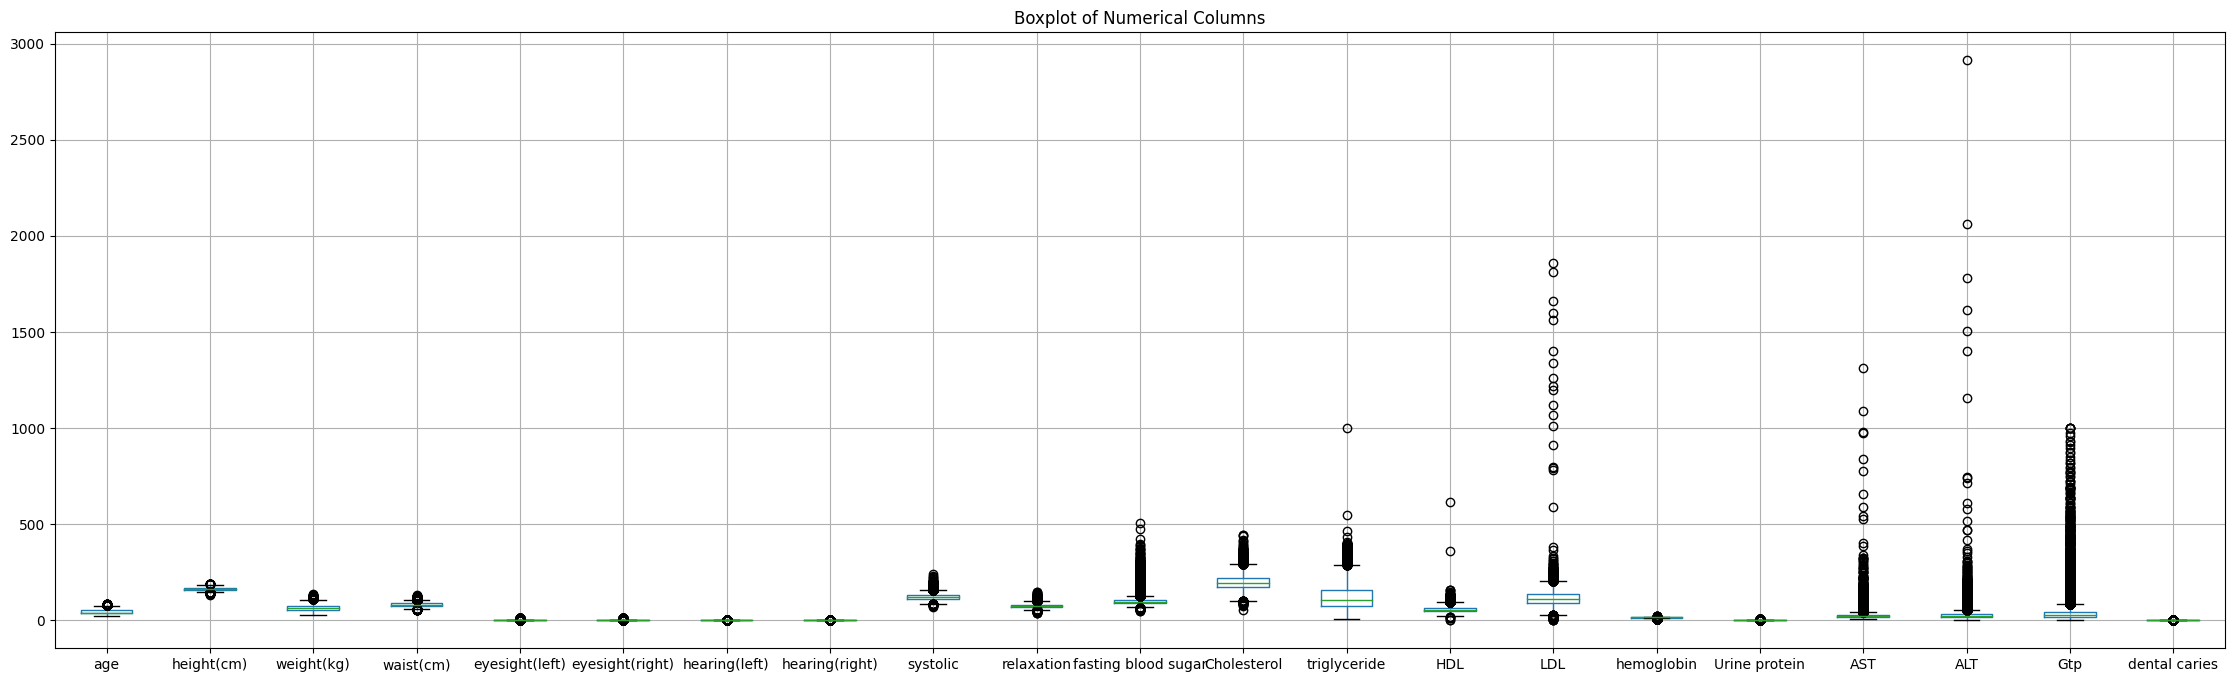

In [10]:
# Specify the columns to plot
numeric_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'AST', 'ALT', 'Gtp', 'dental caries']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(28,8))

# Create the boxplot
df[numeric_cols].boxplot(ax=ax)

# Set the plot title
ax.set_title('Boxplot of Numerical Columns')

# Show the plot
plt.show()

#### Plotting each column

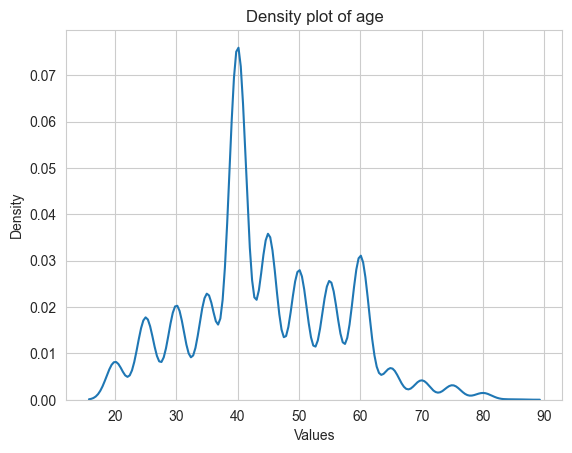

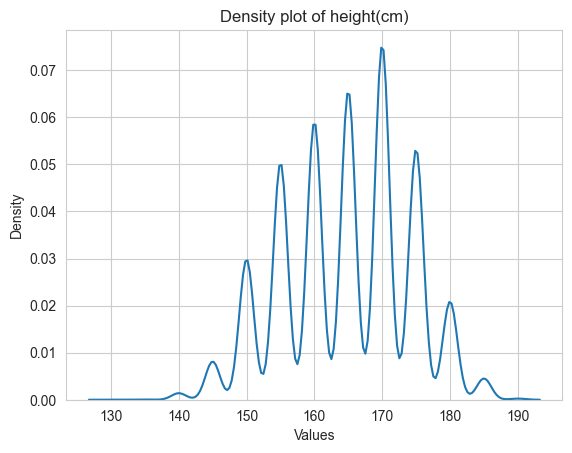

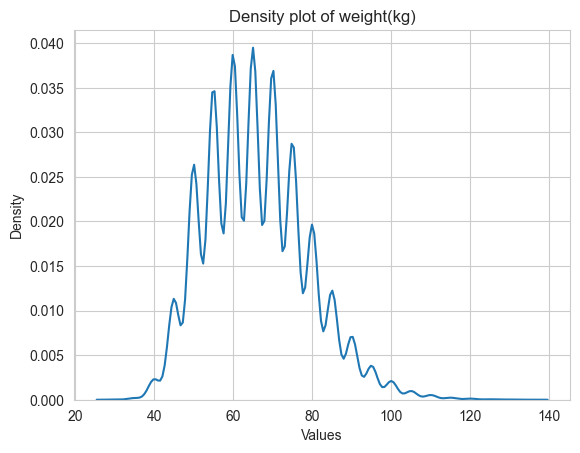

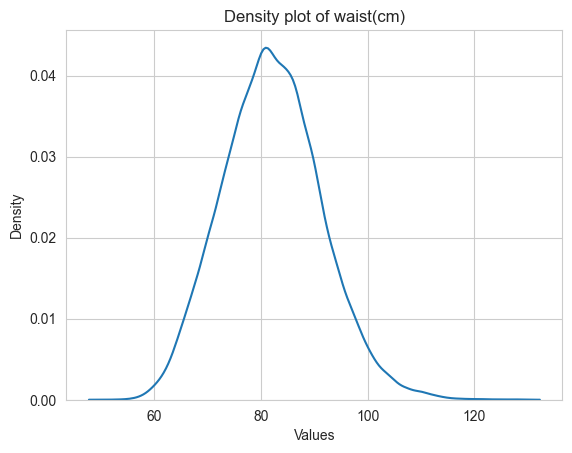

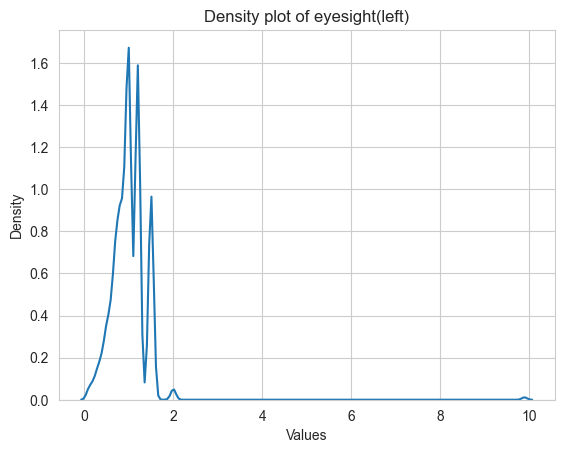

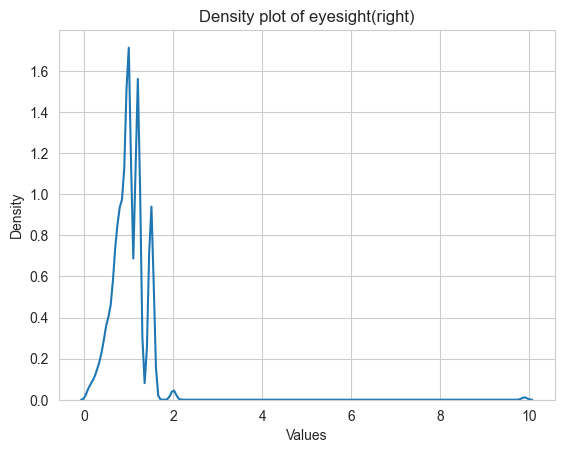

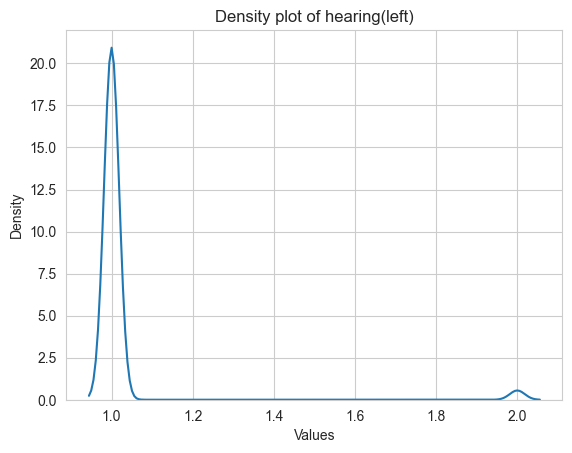

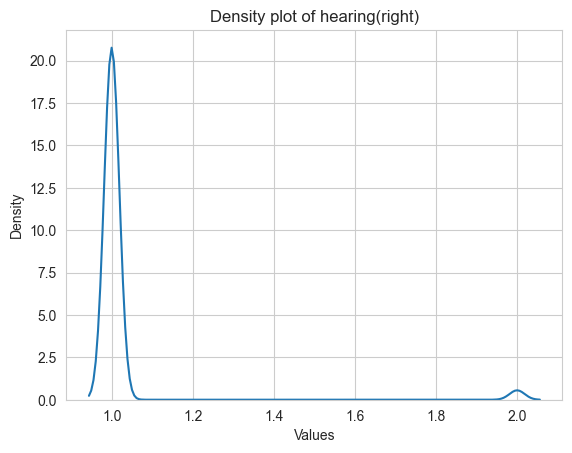

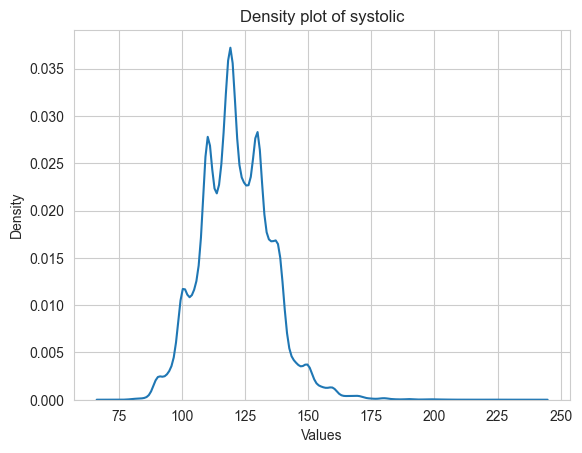

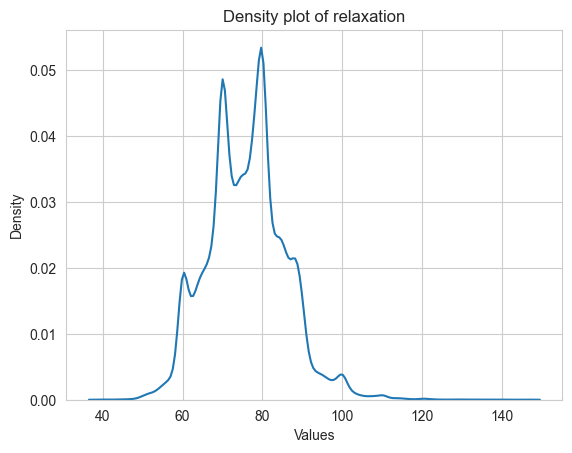

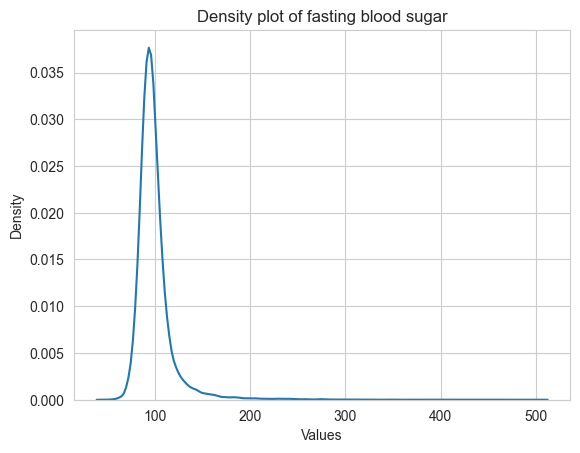

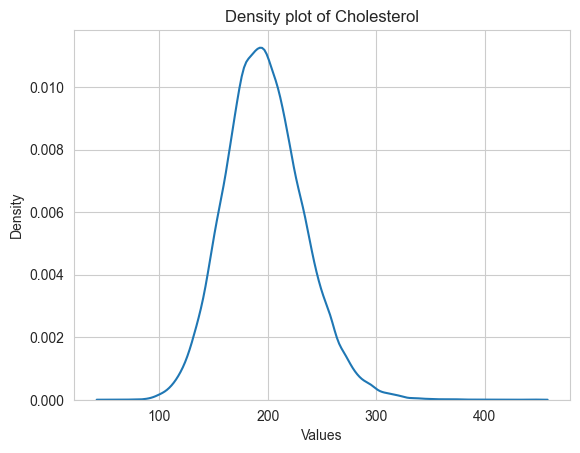

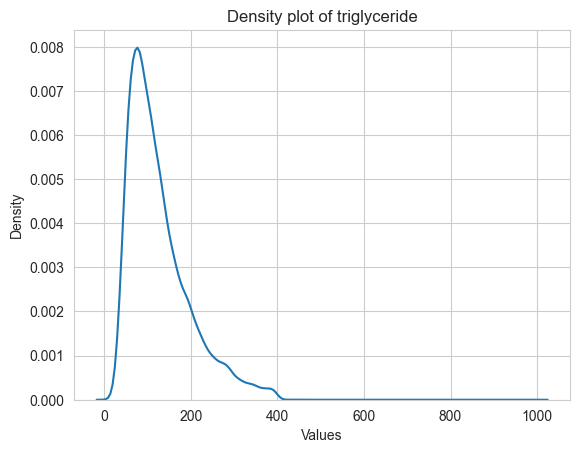

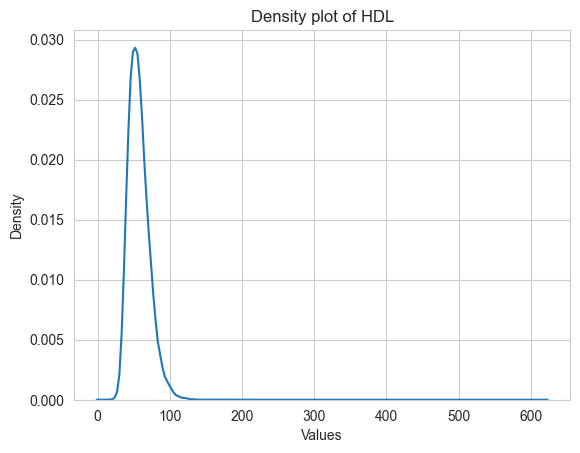

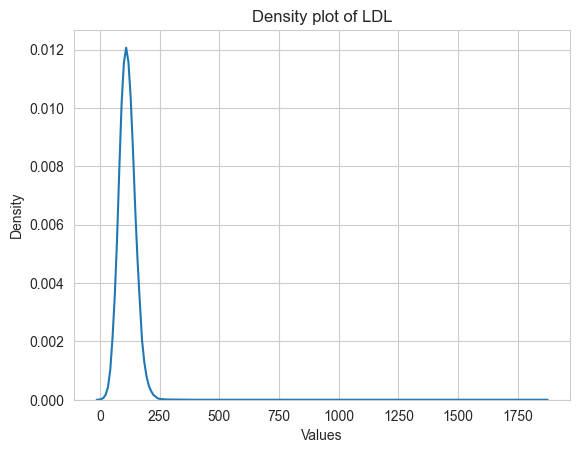

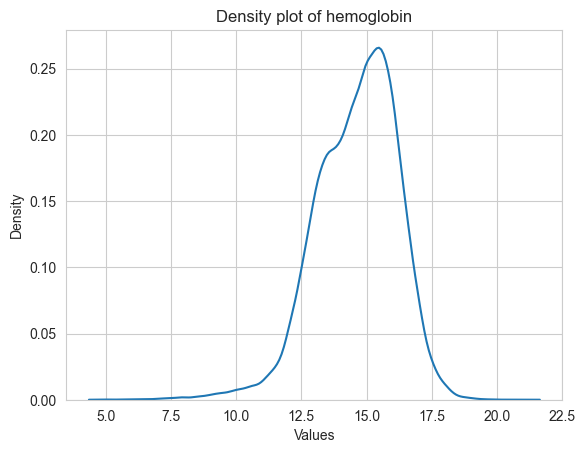

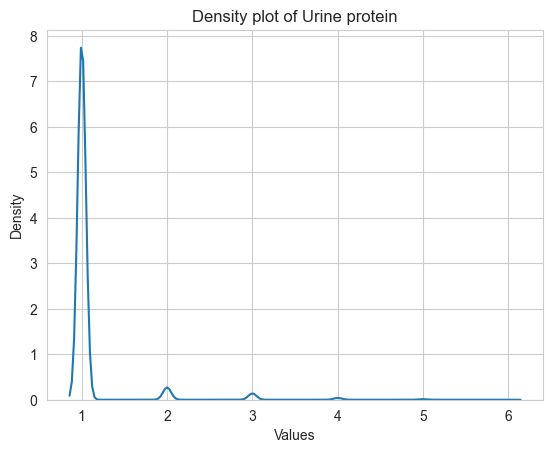

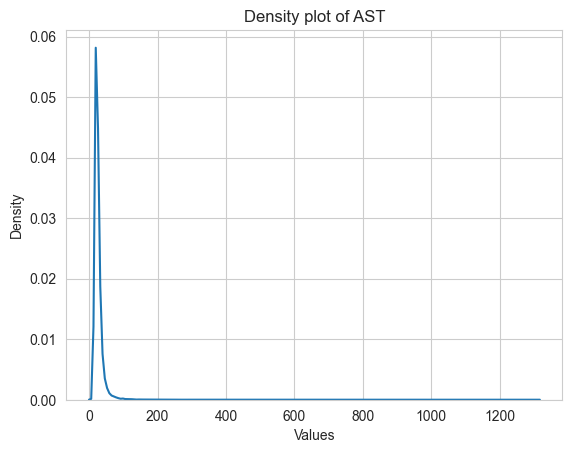

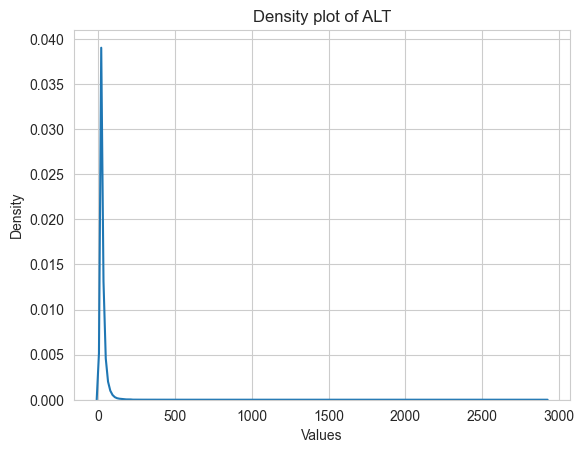

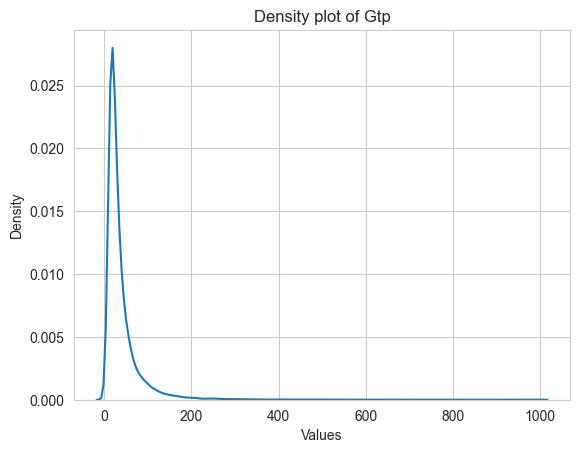

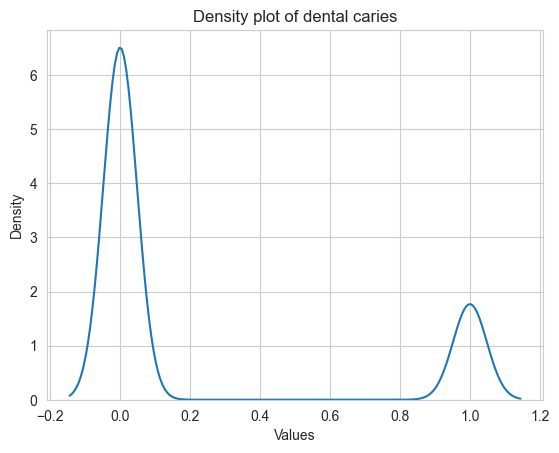

In [11]:
# Loop over each column in the DataFrame
for column_name in numeric_cols:
    
    sns.set_style("whitegrid")
    sns.kdeplot(data=df[column_name])
    plt.xlabel("Values")
    plt.title("Density plot of " + column_name)
    plt.show()

##### Here we use IQR to detect the outliers and be able to remove them

In [12]:
# Identify outliers
outliers = []
for col in df.select_dtypes(include=['float', 'int']):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

# Drop outliers
df.drop(outliers, inplace=True)

In [13]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

- As we can see, we removed the outliers ..

In [16]:
df.shape

(21743, 26)

# Data Exploration and Visualization

In [17]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.0,21743.0,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.000000,21743.0,21743.000000,21743.000000,21743.000000,21743.000000,21743.0
mean,43.611737,164.439130,64.305984,80.555655,1.014165,1.010054,1.0,1.0,119.589937,74.836867,94.777998,194.836821,111.487375,57.796624,114.856138,14.530111,1.0,0.876277,22.710895,21.246056,26.748563,0.0
std,11.548174,9.108791,11.611441,8.416734,0.295231,0.294267,0.0,0.0,12.320521,8.783631,10.007562,32.812777,54.890567,12.954092,30.187948,1.406954,0.0,0.162856,5.845419,9.440915,15.204566,0.0
min,20.000000,145.000000,35.000000,58.000000,0.300000,0.300000,1.0,1.0,85.000000,52.000000,67.000000,100.000000,8.000000,21.000000,26.000000,10.500000,1.0,0.600000,6.000000,1.000000,3.000000,0.0
25%,40.000000,155.000000,55.000000,75.000000,0.800000,0.800000,1.0,1.0,110.000000,69.000000,88.000000,172.000000,70.000000,48.000000,94.000000,13.500000,1.0,0.800000,19.000000,14.000000,16.000000,0.0
50%,40.000000,165.000000,65.000000,80.300000,1.000000,1.000000,1.0,1.0,119.000000,75.000000,94.000000,193.000000,99.000000,57.000000,114.000000,14.600000,1.0,0.900000,22.000000,19.000000,22.000000,0.0
75%,50.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.0,1.0,129.000000,80.000000,101.000000,217.000000,141.000000,66.000000,135.000000,15.600000,1.0,1.000000,26.000000,26.000000,33.000000,0.0
max,75.000000,185.000000,105.000000,106.000000,1.600000,1.600000,1.0,1.0,157.000000,100.000000,126.000000,292.000000,289.000000,94.000000,202.000000,18.800000,1.0,1.200000,44.000000,55.000000,84.000000,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21743 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               21743 non-null  object 
 1   age                  21743 non-null  int64  
 2   height(cm)           21743 non-null  int64  
 3   weight(kg)           21743 non-null  int64  
 4   waist(cm)            21743 non-null  float64
 5   eyesight(left)       21743 non-null  float64
 6   eyesight(right)      21743 non-null  float64
 7   hearing(left)        21743 non-null  int64  
 8   hearing(right)       21743 non-null  int64  
 9   systolic             21743 non-null  int64  
 10  relaxation           21743 non-null  int64  
 11  fasting blood sugar  21743 non-null  int64  
 12  Cholesterol          21743 non-null  int64  
 13  triglyceride         21743 non-null  int64  
 14  HDL                  21743 non-null  int64  
 15  LDL                  21743 non-null 

<AxesSubplot: title={'center': 'Gender'}>

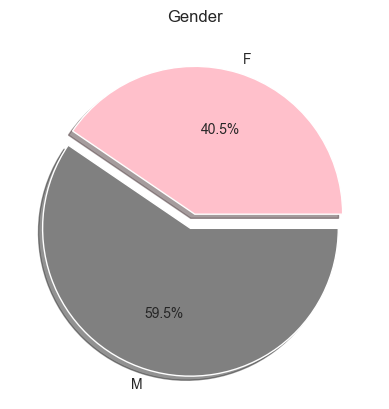

In [19]:
df.groupby('gender').size().plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=["pink", "gray"], title="Gender")

<AxesSubplot: title={'center': 'Tartar'}, xlabel='Age', ylabel='Count'>

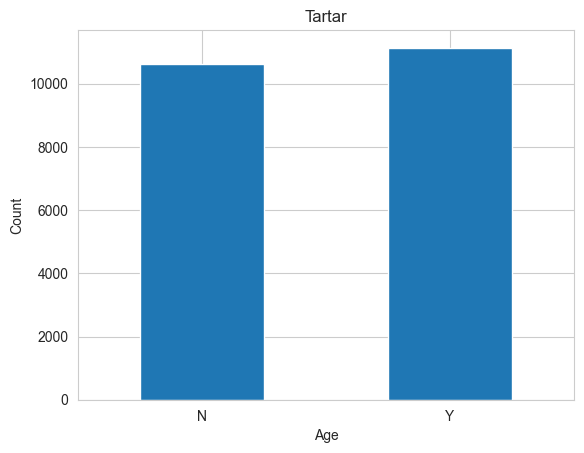

In [20]:
df.groupby('tartar').size().plot(kind='bar', title="Tartar", rot=0, xlabel='Age', ylabel='Count')

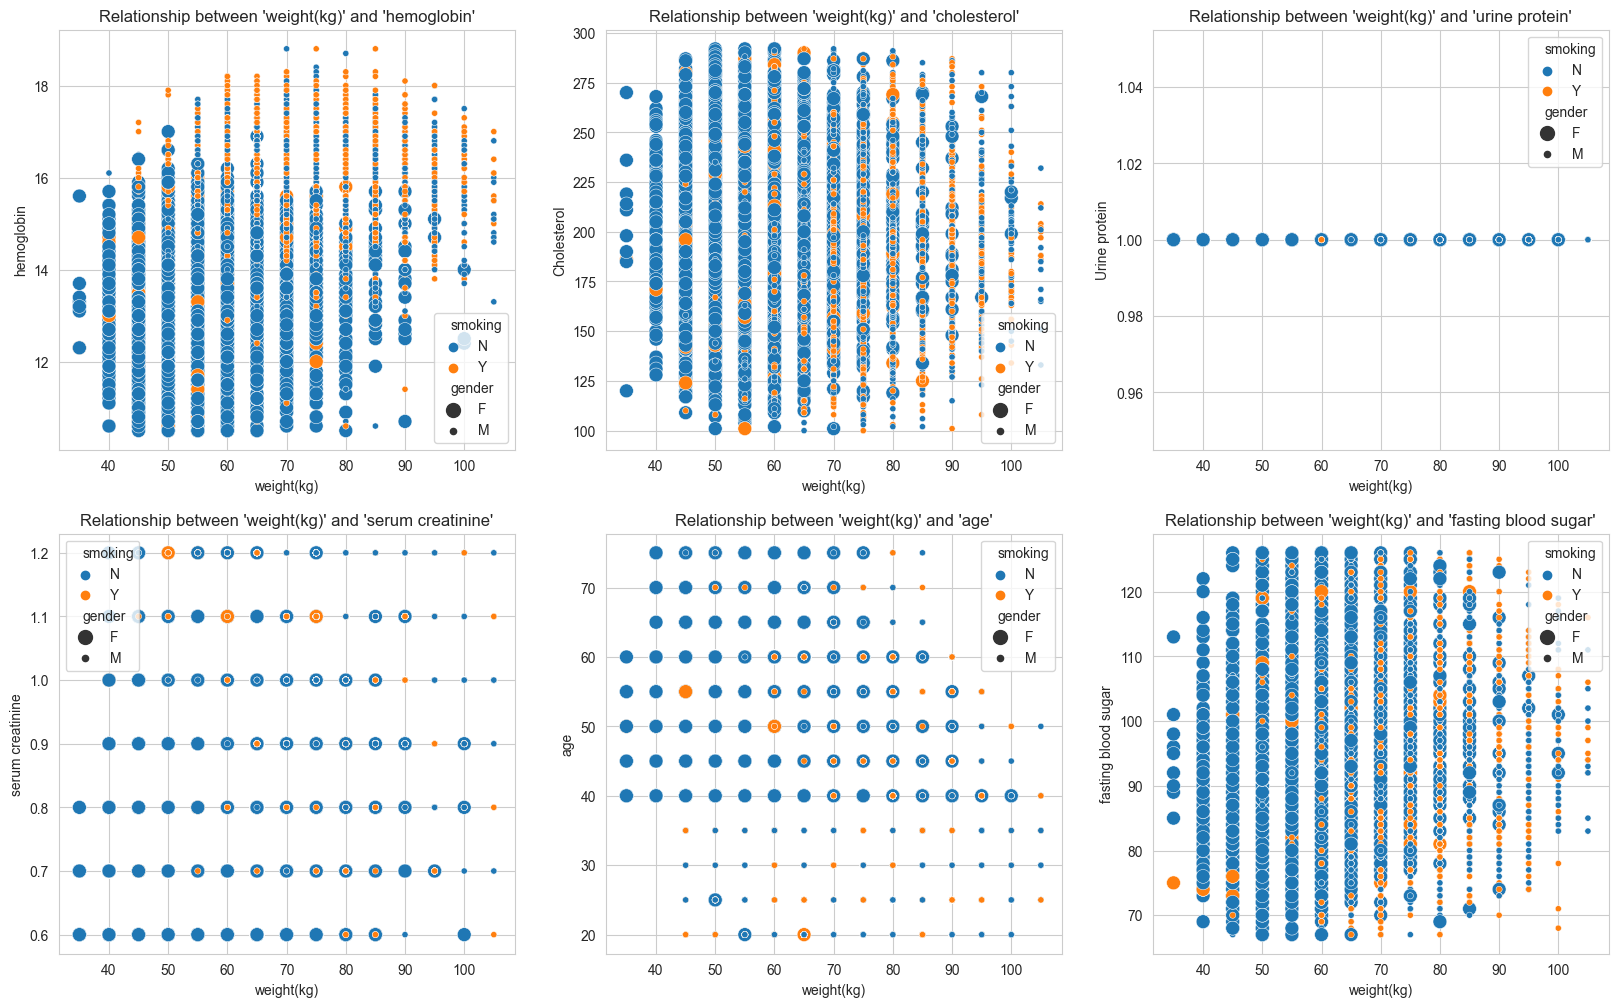

In [21]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "weight(kg)", y = "hemoglobin",
                hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'hemoglobin'");

sns.scatterplot(ax = axes[1], x = "weight(kg)", y = "Cholesterol", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'cholesterol'");

sns.scatterplot(ax = axes[2], x = "weight(kg)", y = "Urine protein", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'urine protein'");

sns.scatterplot(ax = axes[3], x = "weight(kg)", y = "serum creatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'serum creatinine'");

sns.scatterplot(ax = axes[4], x = "weight(kg)", y = "age", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'age'");

sns.scatterplot(ax = axes[5], x = "weight(kg)", y = "fasting blood sugar", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'fasting blood sugar'");

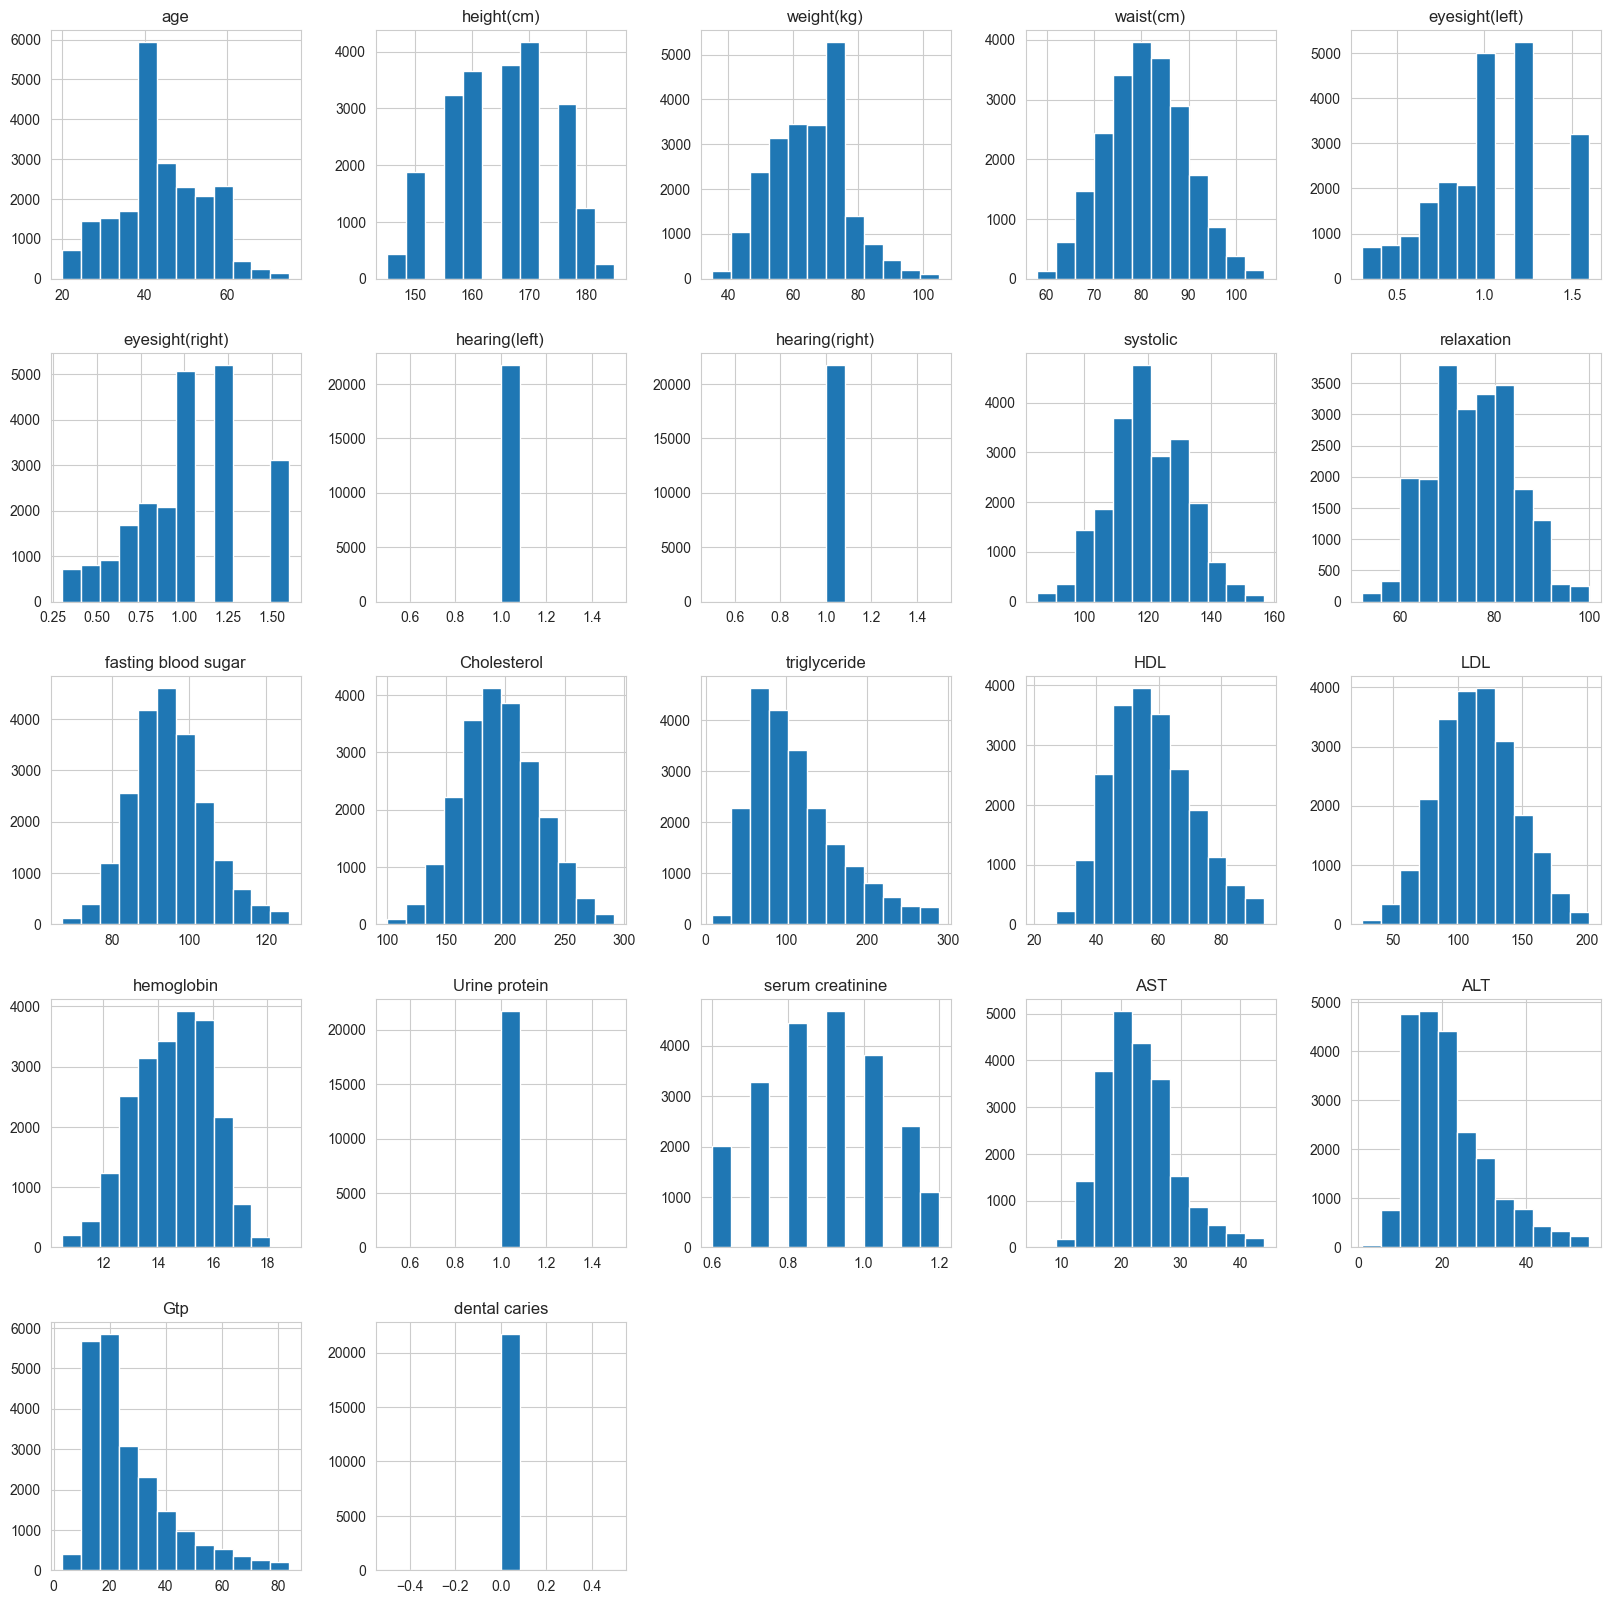

In [22]:
df.hist(figsize = (20, 20), bins = 12, legend = False);

### Observations based on the last exploration:<br>
1. The % of smokers within each blood pressure group is the highest among those who have hypertensive crisis and the least among those with normal blood pressure
2. Maximum people in the dataset have normal blood pressure
3. The highest number of nonsmokers is in the normal blood pressure
    Information source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
4. HDL (the good cholesterol) is higher for non-smokers.
5. Average LDL (the bad cholesterol) is higher for smokers.
6. AST and ALT are healthy for both smoker and non-smoker groups. GTP is at risk for smokers.

## Encoding and Splitting the data

In [23]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])
lbe.fit_transform(df["smoking"])
df["smoking"] = lbe.fit_transform(df["smoking"])

In [24]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1,1,114,73,94,215,82,73,126,12.9,1,0.7,18,19,27,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1,1,138,86,89,242,182,55,151,15.8,1,1.0,21,16,22,0,0,0,1
4,0,40,155,60,86.0,1.0,1.0,1,1,120,74,80,184,74,62,107,12.5,1,0.6,16,14,22,0,0,0,0
5,1,30,180,75,85.0,1.2,1.2,1,1,128,76,95,217,199,48,129,16.2,1,1.2,18,27,33,0,0,1,0
8,0,50,150,60,85.0,0.7,0.8,1,1,115,74,86,210,66,48,149,13.7,1,0.8,31,31,14,0,0,0,0


In [25]:
# select dependent variable (label)
y = df["smoking"]

# select independent variable (estimator)
x = df.drop("smoking", axis = 1)

In [26]:
# Train-Test-Split   
x_train, x_test, y_train, y_test  = train_test_split(x, y,test_size=0.1,random_state=0)

## Scaling the data

In [35]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Classification Models

### Logistic Regression Model

In [36]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1525
           1       0.60      0.57      0.59       650

    accuracy                           0.76      2175
   macro avg       0.71      0.71      0.71      2175
weighted avg       0.76      0.76      0.76      2175

Logistic Regression accuracy is: 75.86%


### Confusion Matrix for Logistic Reggression

Confusion Matrix for Logistic Regression :
 [[1278  247]
 [ 278  372]] 



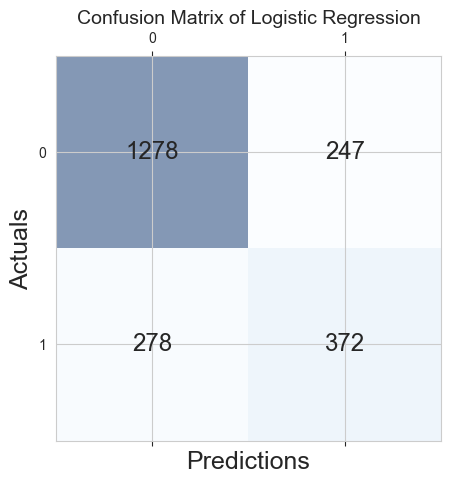

In [37]:
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

### KNN Model

#### To find a optimum value of K we plot a graph of error rate vs K value ranging from 0 to 40

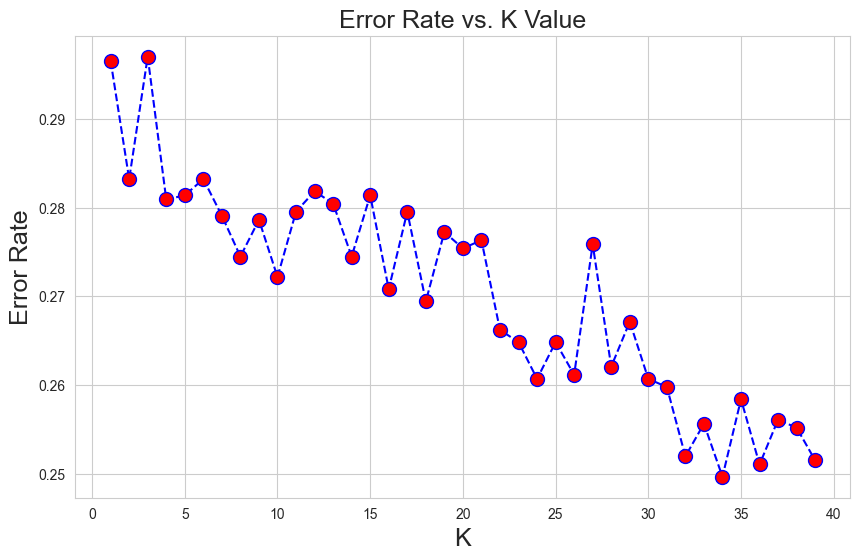

In [38]:
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train,y_train)
    predict_i = kNN.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Error Rate', fontsize=18)
plt.show()

- From the previous graph will observe that the minimum error rate approximately equal 20 % and this percentage occurs when K value = 34

In [39]:
KNN=KNeighborsClassifier(n_neighbors=27)
KNN.fit(x_train,y_train)
y_preds=KNN.predict(x_test)
print(classification_report(y_test, y_preds))
KNNAcc = accuracy_score(y_preds,y_test)
print('KNN model accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1525
           1       0.54      0.48      0.51       650

    accuracy                           0.72      2175
   macro avg       0.67      0.65      0.66      2175
weighted avg       0.72      0.72      0.72      2175

KNN model accuracy is: 72.41%


### Confusion Matrix for KNN

Confusion Matrix for KNN :
 [[1263  262]
 [ 338  312]] 



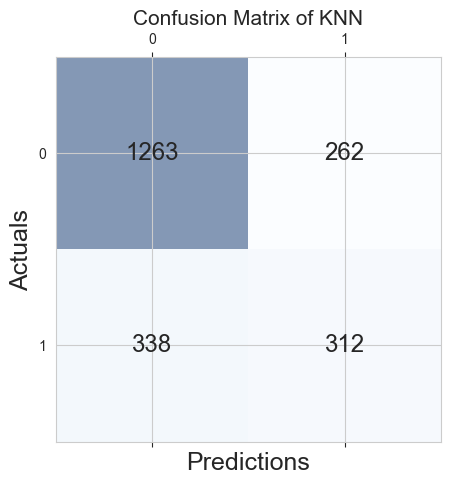

In [40]:
cm = metrics.confusion_matrix(y_test, y_preds)
print('Confusion Matrix for KNN :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN', fontsize=15)
plt.show()